In [2]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import streamlit as st
from PIL import Image
plt.style.use('fivethirtyeight')

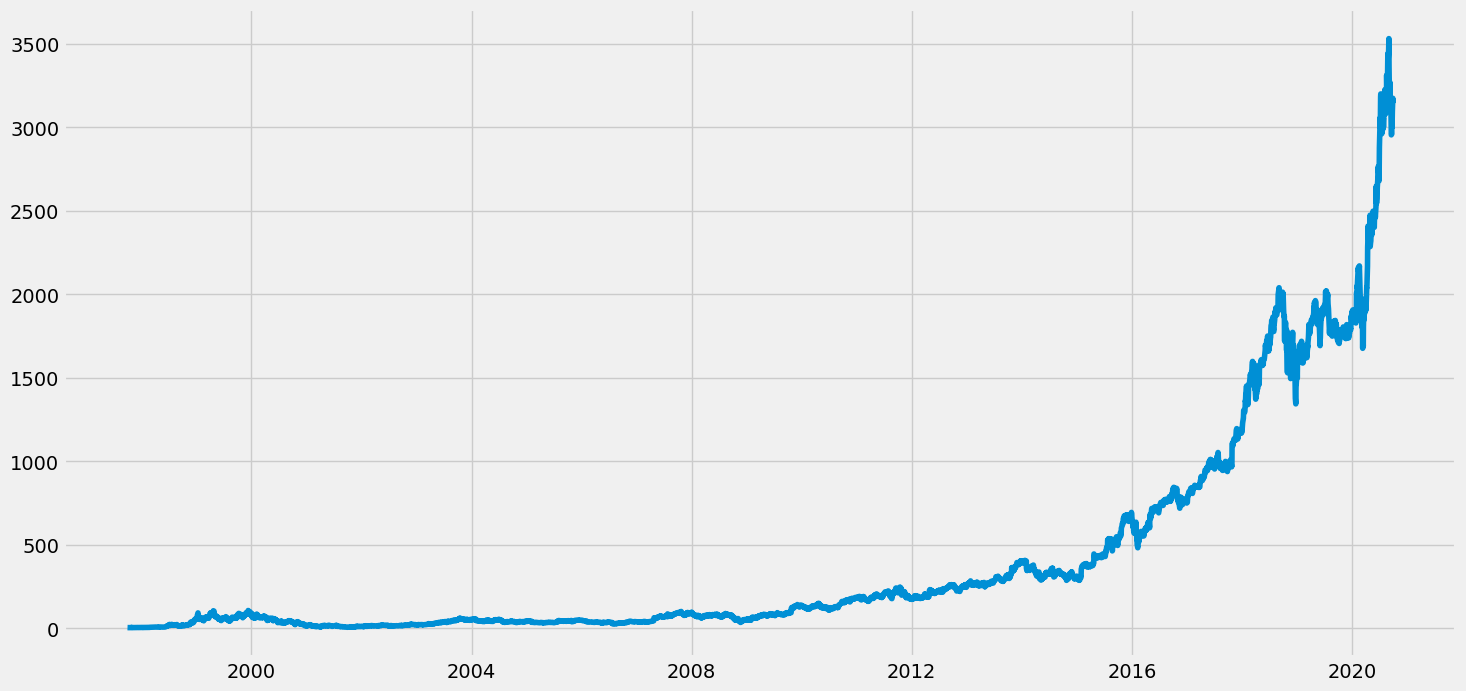

In [4]:
df = pd.read_csv('amazon.csv')
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
###
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()

MinMax Scaler:


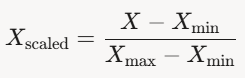

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*0.8)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
###
training_data=scaled_data[0:training_data_len , :]
xtrain=[]
ytrain=[]
n = 60
for i in range(n,len(training_data)):
    xtrain.append(training_data[i-n:i , 0])
    ytrain.append(training_data[i,0])
###
xtrain , ytrain = np.array(xtrain) , np.array(ytrain)
xtrain=np.reshape(xtrain , (xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape, ytrain.shape

((4571, 60, 1), (4571,))

In fact, each member of our X Train has 60 numbers representing the last 60 closed prices.

In [8]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
###
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(xtrain,ytrain,epochs=10,batch_size=32)

Epoch 1/10
143/143 [==============================] - 5s 19ms/step - loss: 0.0013
Epoch 2/10
143/143 [==============================] - 3s 19ms/step - loss: 9.7494e-05
Epoch 3/10
143/143 [==============================] - 3s 19ms/step - loss: 9.5958e-05
Epoch 4/10
143/143 [==============================] - 3s 18ms/step - loss: 9.5531e-05
Epoch 5/10
143/143 [==============================] - 3s 18ms/step - loss: 7.6325e-05
Epoch 6/10
143/143 [==============================] - 3s 18ms/step - loss: 8.8023e-05
Epoch 7/10
143/143 [==============================] - 3s 18ms/step - loss: 1.0063e-04
Epoch 8/10
143/143 [==============================] - 3s 18ms/step - loss: 9.1149e-05
Epoch 9/10
143/143 [==============================] - 3s 19ms/step - loss: 7.8616e-05
Epoch 10/10
143/143 [==============================] - 3s 19ms/step - loss: 7.2501e-05


37/37 [==============================] - 1s 7ms/step


C:\Users\F15\AppData\Local\Temp\ipykernel_12972\935854871.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['prediction']=prediction


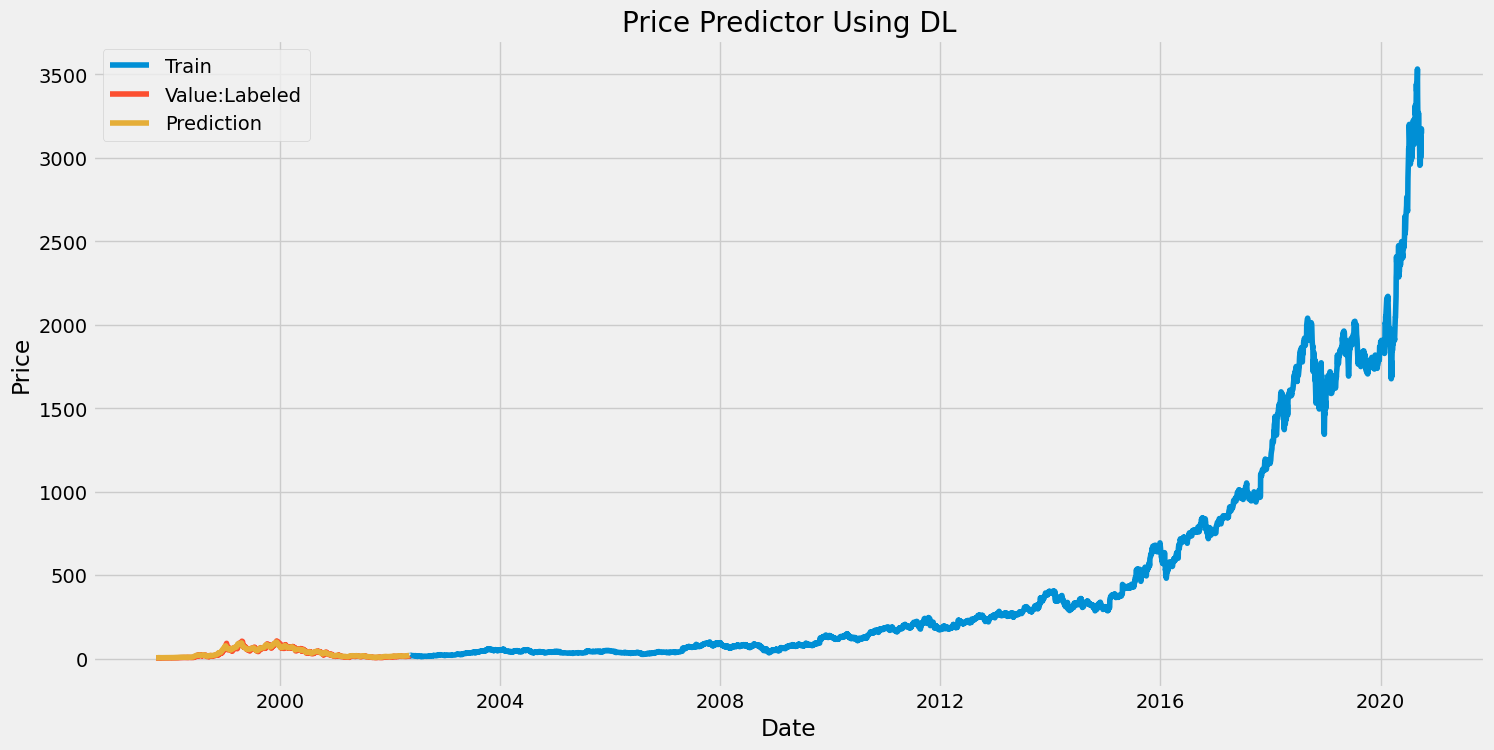

In [9]:
test_data=scaled_data[training_data_len - n : , :]
xtest=[]
ytest=dataset[training_data_len : , :]
for i in range(n , len(test_data)):
    xtest.append(test_data[i-n : i , 0])
###
xtest=np.array(xtest)
xtest=np.reshape(xtest , (xtest.shape[0],xtest.shape[1],1))
###
prediction=model.predict(xtest)
prediction=scaler.inverse_transform(prediction)
#root mean squared error
rmse=np.sqrt(np.mean((prediction - ytest)**2))
###
train=data[:training_data_len]
valid=data[training_data_len:]
valid['prediction']=prediction
###
plt.figure(figsize=(16,8))
plt.title('Price Predictor Using DL')
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(train['Close'])
plt.plot(valid[['Close','prediction']])
plt.legend(['Train','Value:Labeled','Prediction'])
plt.show()

In [18]:
newdf=data[-60:].values
scalednewdf=scaler.transform(newdf)
###
xtest=[]
xtest.append(scalednewdf)
xtest=np.array(xtest)
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
###
pred=model.predict(xtest)
pred=scaler.inverse_transform(pred)
print('Next Day Prediction:  ' , pred)

1/1 [==============================] - 0s 8ms/step
Next Day Prediction:   [[-19.227291]]
